In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

## 1. Fonction quadratique
#### 1.

In [2]:
def f(x):
    return x[0]**2 + 2*x[1]**2 + x[0]*x[1] + x[0] - 3*x[1] + 30

#### 3.

In [3]:
def df_1(x):
    return 2*x[0] + x[1] + 1
def df_2(x):
    return 4*x[1] + x[0] - 3
def gradf(x):
    return np.array([df_1(x), df_2(x)])

## 2. Lignes de niveau et champ de gradient
#### 1.

In [4]:
u, v = np.linspace(0, 1, 5), np.linspace(0, 1, 7)
test = np.meshgrid(u,v)

In [5]:
print(test)

[array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ]]), array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667],
       [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ],
       [0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667],
       [0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])]


#### 2. et 3.

In [6]:
def ligne_niv(obj, dom):
    # Définition des grilles et évaluation de f
    x, y = np.linspace(dom[0], dom[1], 100), np.linspace(dom[2], dom[3], 100)
    X, Y = np.meshgrid(x, y)
    Z = obj([X, Y])

    # Graphique des lignes de niveau
    fig, ax = plt.subplots(figsize = (10, 10))
    CS = ax.contour(X, Y, Z, 50)
    ax.clabel(CS, fontsize = 8)
    ax.set_aspect('equal', adjustable = 'box') # pour que les axes aient la même échelle
    ax.set_xlim([dom[0], dom[1]]) 
    ax.set_ylim([dom[2], dom[3]])
    return fig, ax

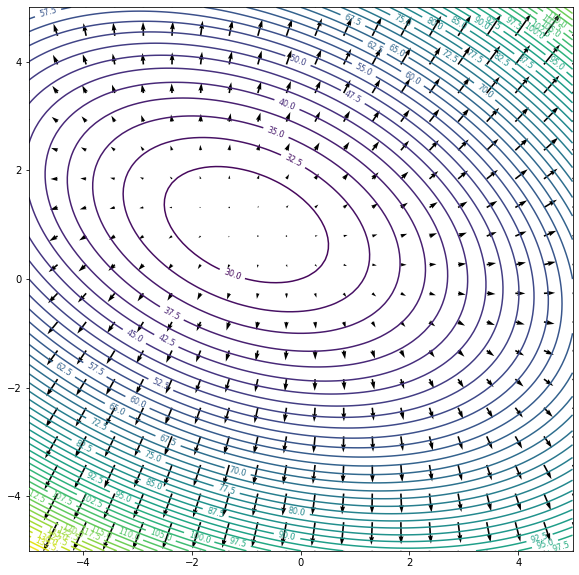

In [7]:
dom = [-5, 5, -5, 5]
fig, ax = ligne_niv(f,dom)

xg, yg = np.linspace(dom[0], dom[1], 20), np.linspace(dom[2], dom[3], 20) # grille plus grossiere
Xg, Yg = np.meshgrid(xg, yg)
u, v = gradf([Xg, Yg])    
plt.quiver(Xg, Yg, u, v)

## 3. Graphe et approximation affine
#### 1. et 2.

In [8]:
def lin_f(x):
    return lambda y: f(x) + df_1(x)*(y[0]-x[0]) + df_2(x)*(y[1]-x[1])

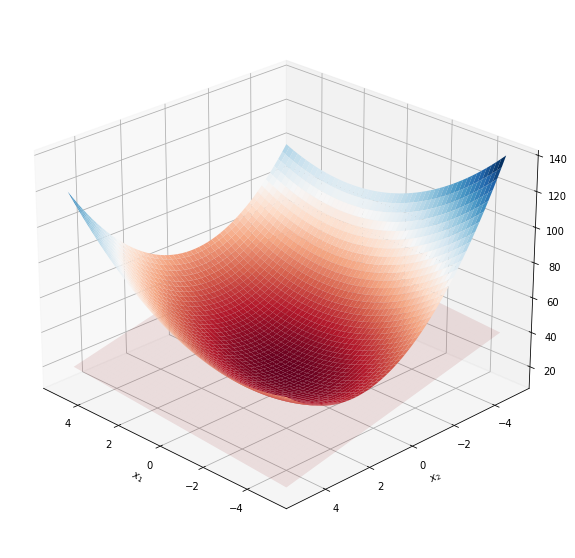

In [9]:
dom = [-5, 5, -5, 5]

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
u, v = np.linspace(dom[0], dom[1], 200), np.linspace(dom[2], dom[3], 200)
X, Y = np.meshgrid(u, v)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.view_init(25, 135) # Pour choisir le point de vue par lequel on regarde le graphe
Z1 = f([X,Y])
ax.plot_surface(X, Y, Z1, cmap=cm.RdBu)

x = np.array([0, 0])
Z2 = lin_f(x)([X,Y]) 
ax.plot_surface(X, Y, Z2, color = "red", alpha = 0.1) # le paramètre alpha gère le niveau de transparence
plt.show()

## 4. Fonction plus tarabiscotée
#### 1. 

In [10]:
def expo(x):
    return np.exp(-(x[0]**2+x[1]**2)/2)
def g(x):
    return 1+(1-(x[0]**2+x[1]**3))*expo(x)

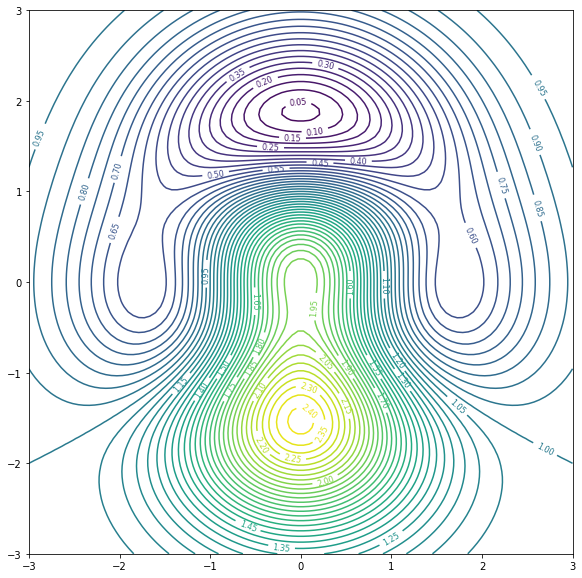

In [11]:
dom = [-3, 3, -3, 3]
fig_ax = ligne_niv(g,dom)

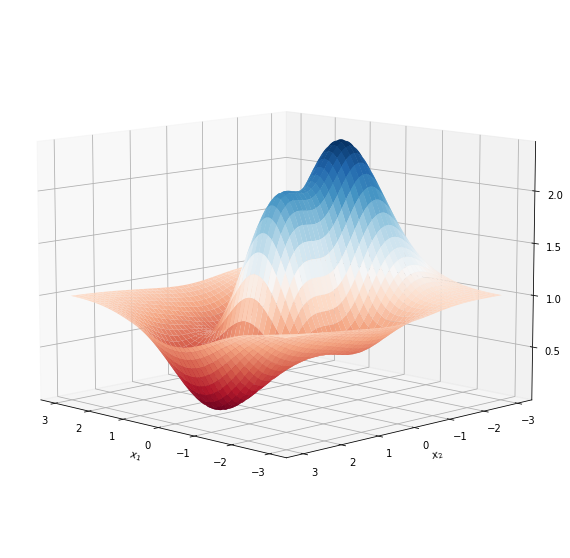

In [12]:
dom = [-3, 3, -3, 3]
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
u, v = np.linspace(dom[0], dom[1], 200), np.linspace(dom[2], dom[3], 200)
X, Y = np.meshgrid(u, v)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.view_init(10, 135)
Z1 = g([X,Y])
ax.plot_surface(X, Y, Z1, cmap=cm.RdBu)

#### 2.

In [13]:
def dg_1(x):
    return x[0]*(-3+x[0]**2+x[1]**3)*expo(x)
def dg_2(x):
    return x[1]*(-1+x[0]**2-3*x[1]+x[1]**3)*expo(x)
def gradg(x):
    return np.array([dg_1(x), dg_2(x)])
def dg_11(x):
    return (4*x[0]**2 -2 +(x[0]**2-1)*(1-(x[0]**2+x[1]**3)))*expo(x)
def dg_12(x):
    return (3*x[0]*x[1]**2 + 2*x[0]*x[1] + x[0]*x[1]*(1-(x[0]**2+x[1]**3)))*expo(x)
def dg_22(x):
    return (-6*x[1] + 6*x[1]**3 + (x[1]**2-1)*(1-(x[0]**2+x[1]**3)))*expo(x)
def hessg(x):
    return np.array([[dg_11(x), dg_12(x)],[dg_12(x), dg_22(x)]])

#### 3.

In [14]:
def lin_g(x):
    return lambda y: g(x) + dg_1(x)*(y[0]-x[0]) + dg_2(x)*(y[1]-x[1])
def quad_g(x):
    return lambda y: lin_g(x)(y) + (0.5)*(y[0]-x[0])**2*dg_11(x) + (y[0]-x[0])*(y[1]-x[1])*dg_12(x) + 0.5*(y[1]-x[1])**2*dg_22(x)

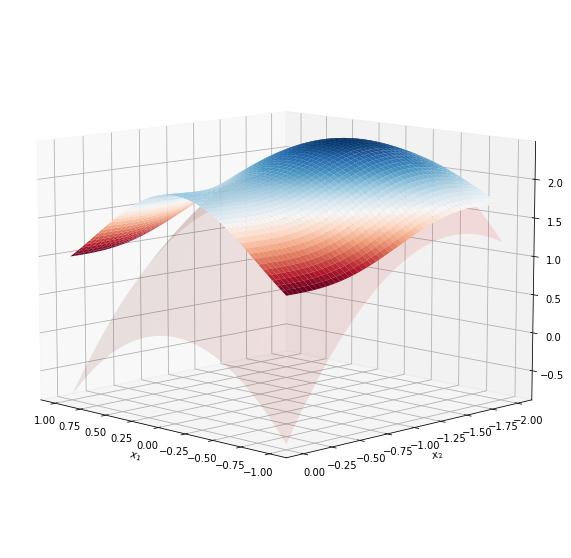

In [15]:
dom = [-1, 1, -2, 0]
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
u, v = np.linspace(dom[0], dom[1], 200), np.linspace(dom[2], dom[3], 200)
X, Y = np.meshgrid(u, v)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.view_init(10, 135)
Z1 = g([X,Y])
ax.plot_surface(X, Y, Z1, cmap=cm.RdBu)

x = np.array([0, -1.5])
Z2 = quad_g(x)([X,Y]) 
ax.plot_surface(X, Y, Z2, color = "red", alpha=0.1)

## 5. Premier contact avec la descente de gradient (à pas fixe)

In [16]:
def descente_gradient(x0, f, gradf, lbda, niter):
    x = x0
    x_list = [x0]
    for k in range(niter):
        x = x - lbda*gradf(x)
        x_list.append(x)
    return x, x_list

In [17]:
def plot_traj_descente(obj, gradobj, dom, xlist):
    X, Y = np.linspace(dom[0], dom[1], 200), np.linspace(dom[2], dom[3], 200)
    X, Y = np.meshgrid(X, Y)
    Z = obj([X, Y])
    Xg, Yg = np.linspace(dom[0], dom[1], 20), np.linspace(dom[2], dom[3], 20) # grille plus grossiere
    Xg, Yg = np.meshgrid(Xg, Yg)
    u, v = gradobj([Xg, Yg])
    
    fig, ax = plt.subplots(figsize = (10, 10))
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, fontsize = 10)
    plt.quiver(Xg, Yg, u, v)
    Xlist = [xlist[i][0] for i in range(len(xlist))]
    Ylist = [xlist[i][1] for i in range(len(xlist))]
    plt.plot(Xlist, Ylist, marker = "o", ms = 3.0, color = "red")

#### 1. et 2.

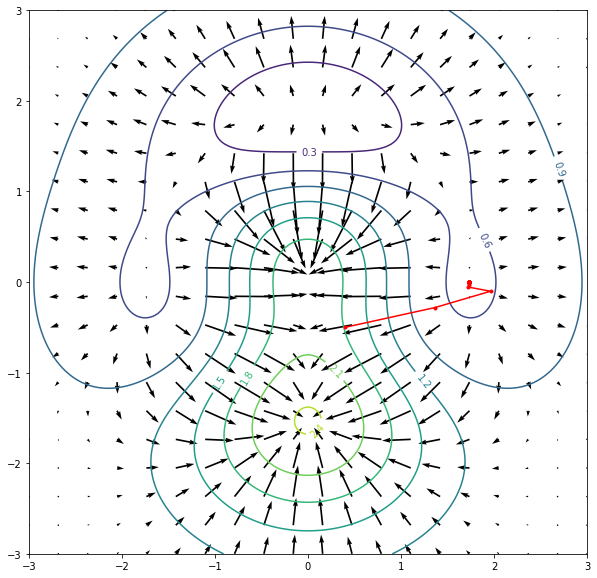

In [18]:
dom = [-3,3,-3,3]
x0 = np.array([0.4,-0.5])
lbda = 1
niter = 10000
xstar_approx, x_list = descente_gradient(x0, g, gradg, lbda, niter) 
plot_traj_descente(g, gradg, dom, x_list)
plt.show()